In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelBinarizer, LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, f_oneway, chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report, roc_curve,auc, roc_auc_score


In [2]:
df1 = pd.read_excel('run_01.xlsx')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country Code           47 non-null     object 
 1   Sub_region_code        47 non-null     int64  
 2   Subregion Asia         47 non-null     object 
 3   incomegroup_code       47 non-null     int64  
 4   IncomeGroup            47 non-null     object 
 5   Country_Name           47 non-null     object 
 6   Suku_bunga             47 non-null     float64
 7   Selisih Inflasi        47 non-null     float64
 8   Oil Price (USD/LITER)  47 non-null     float64
 9   Cadangan Devisa        47 non-null     int64  
 10  Risk                   47 non-null     float64
 11  Y (exchange Rate)      47 non-null     int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 4.5+ KB


In [4]:
df1.head()

,Country Code,Sub_region_code,Subregion Asia,incomegroup_code,IncomeGroup,Country_Name,Suku_bunga,Selisih Inflasi,Oil Price (USD/LITER),Cadangan Devisa,Risk,Y (exchange Rate)
0,AFG,0,Asia Selatan,0,Low income,Afghanistan,9.00,0.90,0.50,156000000000000,-1.73,1
1,ARE,3,Asia Barat,3,High income,United Arab Emirates,3.95,-0.45,0.72,380200000000000,0.55,1
2,ARM,4,Asia Tengah (Kaukasus),2,Upper middle income,Armenia,6.75,0.00,0.48,368522014294538,-0.16,1
3,AZE,4,Asia Tengah (Kaukasus),2,Upper middle income,Azerbaijan,7.00,0.80,0.64,126991242999099,-0.67,1
4,BGD,0,Asia Selatan,1,Lower middle income,Bangladesh,10.00,-0.19,0.51,213947957330405,-0.82,1


In [5]:
df1.isnull().sum()

Country Code             0
Sub_region_code          0
Subregion Asia           0
incomegroup_code         0
IncomeGroup              0
Country_Name             0
Suku_bunga               0
Selisih Inflasi          0
Oil Price (USD/LITER)    0
Cadangan Devisa          0
Risk                     0
Y (exchange Rate)        0
dtype: int64

# Prepocessing (Preparasi Data)

In [6]:
df1 = df1.rename(columns={'Y (exchange Rate) ': 'Exchange_Rate'})
df1 = df1.rename(columns={'Oil Price (USD/LITER)': 'Oil_Price'})
df1 = df1.rename(columns={'Cadangan Devisa': 'Cadangan_Devisa'})
df1 = df1.rename(columns={'Selisih Inflasi': 'Inflasi'})

In [7]:
#df1['Inflasi'] = pd.to_numeric(df1['Inflasi'], errors='coerce')
#df1['Oil_Price'] = pd.to_numeric(df1['Oil_Price'], errors='coerce')
#df1['Suku_bunga'] = pd.to_numeric(df1['Suku_bunga'], errors='coerce')
#df1['Risk'] = pd.to_numeric(df1['Risk'], errors='coerce')
#df1['Cadangan_Devisa'] = pd.to_numeric(df1['Cadangan_Devisa'], errors='coerce')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Code      47 non-null     object 
 1   Sub_region_code   47 non-null     int64  
 2   Subregion Asia    47 non-null     object 
 3   incomegroup_code  47 non-null     int64  
 4   IncomeGroup       47 non-null     object 
 5   Country_Name      47 non-null     object 
 6   Suku_bunga        47 non-null     float64
 7   Inflasi           47 non-null     float64
 8   Oil_Price         47 non-null     float64
 9   Cadangan_Devisa   47 non-null     int64  
 10  Risk              47 non-null     float64
 11  Exchange_Rate     47 non-null     int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 4.5+ KB


Kami melakukan Normalisasi Data menggunakan MinMaxScaler dikarenakan pada Cadangan_Devisa terlalu banyak angka dan tidak stabil

In [9]:
numeric_cols = ['Suku_bunga','Inflasi','Oil_Price','Cadangan_Devisa','Risk']

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Code      47 non-null     object 
 1   Sub_region_code   47 non-null     int64  
 2   Subregion Asia    47 non-null     object 
 3   incomegroup_code  47 non-null     int64  
 4   IncomeGroup       47 non-null     object 
 5   Country_Name      47 non-null     object 
 6   Suku_bunga        47 non-null     float64
 7   Inflasi           47 non-null     float64
 8   Oil_Price         47 non-null     float64
 9   Cadangan_Devisa   47 non-null     int64  
 10  Risk              47 non-null     float64
 11  Exchange_Rate     47 non-null     int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 4.5+ KB


In [11]:
scaler = StandardScaler()
df1[numeric_cols] = scaler.fit_transform(df1[numeric_cols])
print(df1)

   Country Code  Sub_region_code  \
0           AFG                0   
1           ARE                3   
2           ARM                4   
3           AZE                4   
4           BGD                0   
5           BHR                3   
6           BRN                1   
7           BTN                0   
8           CHN                2   
9           CYP                3   
10          GEO                4   
11          IDN                1   
12          IND                0   
13          IRQ                3   
14          ISR                3   
15          JOR                3   
16          JPN                2   
17          KAZ                4   
18          KGZ                4   
19          KHM                1   
20          KWT                3   
21          LAO                1   
22          LBN                3   
23          LKA                0   
24          MDV                0   
25          MMR                1   
26          MNG             

In [12]:
df1.head()

,Country Code,Sub_region_code,Subregion Asia,incomegroup_code,IncomeGroup,Country_Name,Suku_bunga,Inflasi,Oil_Price,Cadangan_Devisa,Risk,Exchange_Rate
0,AFG,0,Asia Selatan,0,Low income,Afghanistan,0.402062,0.403176,-0.454229,-1.186099,-1.779315,1
1,ARE,3,Asia Barat,3,High income,United Arab Emirates,-0.663474,-0.280822,0.028973,-0.007195,1.118206,1
2,ARM,4,Asia Tengah (Kaukasus),2,Upper middle income,Armenia,-0.072682,-0.052823,-0.498157,-0.068601,0.215908,1
3,AZE,4,Asia Tengah (Kaukasus),2,Upper middle income,Azerbaijan,-0.019933,0.352510,-0.146737,-1.338635,-0.432222,1
4,BGD,0,Asia Selatan,1,Lower middle income,Bangladesh,0.613059,-0.149089,-0.432265,-0.881393,-0.622848,1


In [13]:
df1.tail()

,Country Code,Sub_region_code,Subregion Asia,incomegroup_code,IncomeGroup,Country_Name,Suku_bunga,Inflasi,Oil_Price,Cadangan_Devisa,Risk,Exchange_Rate
42,SYR,3,Asia Barat,0,Low income,Syrian Arab Republic,0.613059,-3.513345,-0.454229,-0.035064,-1.347228,0
43,YEM,3,Asia Barat,0,Low income,Yemen. Rep.,0.613059,2.176504,-0.520120,0.000692,-1.398062,0
44,IRN,3,Asia Barat (kadang dikaji sebagai Asia Selatan),1,Lower middle income,Iran,3.356023,1.416506,-0.761722,0.043284,-0.877017,1
45,TUR,3,Asia Barat,2,Upper middle income,Turkey,1.668045,-0.265622,1.280907,-0.020867,0.101532,1
46,VNM,1,Asia Tenggara,1,Lower middle income,Vietnam,-0.547426,-0.118689,0.094865,2.362278,-0.165345,0


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Code      47 non-null     object 
 1   Sub_region_code   47 non-null     int64  
 2   Subregion Asia    47 non-null     object 
 3   incomegroup_code  47 non-null     int64  
 4   IncomeGroup       47 non-null     object 
 5   Country_Name      47 non-null     object 
 6   Suku_bunga        47 non-null     float64
 7   Inflasi           47 non-null     float64
 8   Oil_Price         47 non-null     float64
 9   Cadangan_Devisa   47 non-null     float64
 10  Risk              47 non-null     float64
 11  Exchange_Rate     47 non-null     int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 4.5+ KB


Encode Data Kategorikal untuk dijadikan data Numerik supaya bisa di regresi

In [15]:
le = LabelEncoder()
df1['Sub_region_code'] = le.fit_transform(df1['Sub_region_code'])
df1['incomegroup_code'] = le.fit_transform(df1['incomegroup_code'])


# Uji Korelasi antar Variabel Numerik dan Kategorikal

Numerik V Numerik


=== Matriks Korelasi Spearman ===
                 Suku_bunga   Inflasi  Oil_Price  Cadangan_Devisa      Risk
Suku_bunga         1.000000 -0.011149  -0.440386         0.143763 -0.522063
Inflasi           -0.011149  1.000000  -0.033528        -0.251128 -0.065654
Oil_Price         -0.440386 -0.033528   1.000000        -0.349411  0.196054
Cadangan_Devisa    0.143763 -0.251128  -0.349411         1.000000  0.119062
Risk              -0.522063 -0.065654   0.196054         0.119062  1.000000


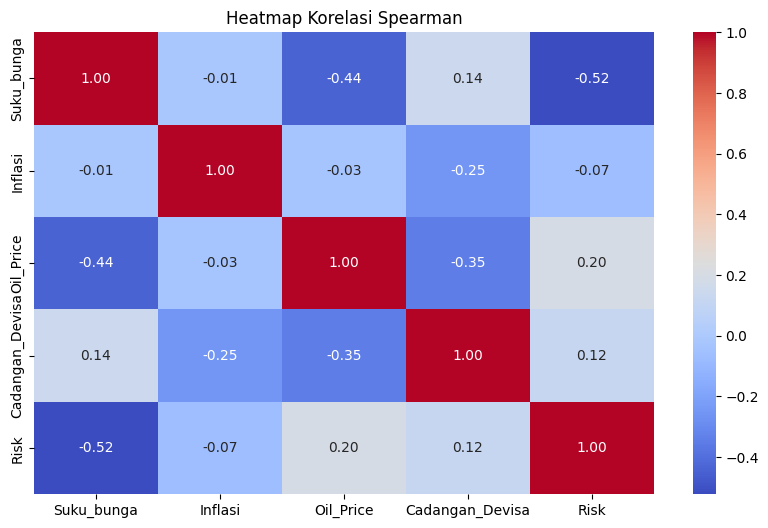

In [16]:
spearman_corr = df1[numeric_cols].corr(method="spearman")

print("\n=== Matriks Korelasi Spearman ===")
print(spearman_corr)

plt.figure(figsize=(10,6))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Spearman")
plt.show()

Numerik V Kategorik

In [17]:
kategorik_cols = ['Sub_region_code', 'incomegroup_code']

In [18]:
for cat in kategorik_cols:
    print(f"\nANOVA untuk {cat}:")
    for num in numeric_cols:
        groups = [group[num].values for name, group in df1.groupby(cat)]
        f_val, p_val = f_oneway(*groups)
        print(f"{num}: F={f_val:.3f}, p={p_val:.3f}")


ANOVA untuk Sub_region_code:
Suku_bunga: F=2.338, p=0.071
Inflasi: F=0.736, p=0.573
Oil_Price: F=0.988, p=0.425
Cadangan_Devisa: F=0.626, p=0.647
Risk: F=0.804, p=0.530

ANOVA untuk incomegroup_code:
Suku_bunga: F=3.364, p=0.027
Inflasi: F=0.076, p=0.973
Oil_Price: F=1.822, p=0.158
Cadangan_Devisa: F=0.971, p=0.415
Risk: F=21.166, p=0.000


- Variabel numerik sebagian besar tidak berbeda antar wilayah, tapi beberapa variabel, khususnya Suku_bunga dan Risk, berbeda signifikan antar kelompok pendapatan.

Kategorik V Kategorik

In [19]:
for i in range(len(kategorik_cols)):
    for j in range(i+1, len(kategorik_cols)):
        col1 = kategorik_cols[i]
        col2 = kategorik_cols[j]
        
        # Crosstab
        table = pd.crosstab(df1[col1], df1[col2])
        
        # Chi-square test
        chi2, p, dof, ex = chi2_contingency(table)
        
        # Cramér's V
        n = table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(table.shape)-1)))
        
        print(f"\n{col1} vs {col2}:")
        print(f"Cramér's V = {cramers_v:.3f}, p-value = {p:.3f}")



Sub_region_code vs incomegroup_code:
Cramér's V = 0.418, p-value = 0.017


- Cramer's V = Menunujukkan asosiasi sedang antara sub_region_code dan Incomegroup_code, Tidak lemah tapi juga belum sangat kuat
- P-Value = dari hasilnya, kategorik ini signifikan secara statistik, perbedaan distribusi kategori antara kedua variabel tidak terjadi secara kebetulan

Conclusion : Hubungan menengah yang signifikan antar wilayah dan kolom pendapatan

# Uji Multikolinearitas Data

In [20]:
XVif = df1[numeric_cols].copy()

vif_data = pd.DataFrame()
vif_data["Variabel"] = XVif.columns
vif_data["VIF"] = [variance_inflation_factor(XVif.values, i) for i in range(XVif.shape[1])]

print(vif_data)

          Variabel       VIF
0       Suku_bunga  1.309733
1          Inflasi  1.041439
2        Oil_Price  1.303721
3  Cadangan_Devisa  1.110572
4             Risk  1.525626


# Analisis Regresi Logistik 


Y = Exchange_Rate Biner dengan keterangan (0 = Turun) dan (1 = Naik)

X = Suku_bunga, Inflasi, Oil_Price, Cadangan_Devisa, Risk

NIlai Batas Keputusan - (Treshold / Sigmoid) = 

    

In [21]:
X = df1[['Suku_bunga','Inflasi','Oil_Price','Cadangan_Devisa','Risk']]
y = df1["Exchange_Rate"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
clf = LogisticRegression(max_iter=200, random_state=0)
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [24]:
acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 40.00%


In [25]:
print("Intercept:", model.intercept_)
print("Koefisien:", model.coef_)

Intercept: [0.54159275]
Koefisien: [[ 0.18509156  0.03635047 -0.54202312 -0.35246649  0.12111209]]


In [26]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

print("Prediksi kelas:", y_pred)
print("Probabilitas:", y_prob)
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Prediksi kelas: [1 1 1 1 0 1 0 0 1 1 0 1 1 0 0]
Probabilitas: [[0.32160916 0.67839084]
 [0.41141694 0.58858306]
 [0.44808047 0.55191953]
 [0.41443472 0.58556528]
 [0.5545948  0.4454052 ]
 [0.46284991 0.53715009]
 [0.71160924 0.28839076]
 [0.61775346 0.38224654]
 [0.35462505 0.64537495]
 [0.42303668 0.57696332]
 [0.54353648 0.45646352]
 [0.36659193 0.63340807]
 [0.41829369 0.58170631]
 [0.6350146  0.3649854 ]
 [0.52795413 0.47204587]]
Akurasi: 0.4666666666666667
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.44      0.57      0.50         7

    accuracy                           0.47        15
   macro avg       0.47      0.47      0.46        15
weighted avg       0.47      0.47      0.46        15



# UJi Serentak / Likelihood Ratio Test (Maximum Likelihood Estimation)

ASUMSI

- Jika p-value < 0.05 → tolak H0 (Variabel independen signifikan secara serentak, dan Var independen bisa menjelaskan Y dengan baik)

- p-value ≥ 0.05 → gagal tolak H0 (Variabel independen tidak signifikan secara serentak, dan Var independen tidak bisa menjelaskan Y dengan baik)

In [28]:
X_const = sm.add_constant(X)
model = sm.Logit(y, X_const).fit(method='bfgs', maxiter=100)
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.626182
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
                           Logit Regression Results                           
Dep. Variable:          Exchange_Rate   No. Observations:                   47
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            5
Date:                Tue, 18 Nov 2025   Pseudo R-squ.:                 0.08186
Time:                        01:55:36   Log-Likelihood:                -29.431
converged:                       True   LL-Null:                       -32.055
Covariance Type:            nonrobust   LLR p-value:                    0.3863
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3326  

Kita lihat dari LLR p-value yang sudah tertera di 'model_summary'. hasilnya adalah 0.5143, dan menghasilkan asumsi  p-value ≥ 0.05 yang berarti GAGAL TOLAK H0, dengan arti Variabel X tidak signifikan secara serentak / variabel indepoenden tidak menjelaskan Y dengan baik

# Uji Parsial /  Wald Test 

In [29]:
X_const = sm.add_constant(X)  #ini intercept 
model = sm.Logit(y, X_const).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.626182
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          Exchange_Rate   No. Observations:                   47
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            5
Date:                Tue, 18 Nov 2025   Pseudo R-squ.:                 0.08186
Time:                        01:55:36   Log-Likelihood:                -29.431
converged:                       True   LL-Null:                       -32.055
Covariance Type:            nonrobust   LLR p-value:                    0.3863
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3327      0.315      1.057      0.291      -0.284       0.950
Suku_bunga    

Dari tabel diatas, ditunjukkan nilai Z yang artinya 'hit' dari pengujian Parsial analisis regresi logistik, yang dihitung melalui (coef/std err)^2, 

# Uji Goodness of Fit 

In [30]:
ll_null = model.llnull      # log-likelihood model null
ll_model = model.llf        # log-likelihood model fitted

cox_snell = 1 - np.exp((ll_null - ll_model)*2/len(df1))
nagelkerke = cox_snell / (1 - np.exp(ll_null*2/len(df1)))

print("\nPseudo R² - Cox & Snell :", cox_snell)
print("Pseudo R² - Nagelkerke  :", nagelkerke)


Pseudo R² - Cox & Snell : 0.10565629403190802
Pseudo R² - Nagelkerke  : 0.14194029386440912


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Code      47 non-null     object 
 1   Sub_region_code   47 non-null     int64  
 2   Subregion Asia    47 non-null     object 
 3   incomegroup_code  47 non-null     int64  
 4   IncomeGroup       47 non-null     object 
 5   Country_Name      47 non-null     object 
 6   Suku_bunga        47 non-null     float64
 7   Inflasi           47 non-null     float64
 8   Oil_Price         47 non-null     float64
 9   Cadangan_Devisa   47 non-null     float64
 10  Risk              47 non-null     float64
 11  Exchange_Rate     47 non-null     int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 4.5+ KB


# Confusion Matrix

In [32]:
y_prob = model.predict(X_const)

y_pred = (y_prob >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

# Laporan lengkap
print("\nClassification Report:\n")
print(classification_report(y, y_pred))

Confusion Matrix:
 [[ 8 12]
 [ 5 22]]

Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.40      0.48        20
           1       0.65      0.81      0.72        27

    accuracy                           0.64        47
   macro avg       0.63      0.61      0.60        47
weighted avg       0.63      0.64      0.62        47



# Analisis Regresi Logistik Dummy

In [33]:
label_binarizer = LabelBinarizer()
label_binarizer_output = label_binarizer.fit_transform(df1['IncomeGroup'])
result_df = pd.DataFrame(label_binarizer_output,
                         columns = label_binarizer.classes_)



df1 = pd.concat([df1, result_df], axis=1)
df1 = df1.drop('IncomeGroup', axis=1)
display(df1)

,Country Code,Sub_region_code,Subregion Asia,incomegroup_code,Country_Name,Suku_bunga,Inflasi,Oil_Price,Cadangan_Devisa,Risk,Exchange_Rate,High income,Low income,Lower middle income,Upper middle income
0,AFG,0,Asia Selatan,0,Afghanistan,0.402062,0.403176,-0.454229,-1.186099,-1.779315,1,0,1,0,0
1,ARE,3,Asia Barat,3,United Arab Emirates,-0.663474,-0.280822,0.028973,-0.007195,1.118206,1,1,0,0,0
2,ARM,4,Asia Tengah (Kaukasus),2,Armenia,-0.072682,-0.052823,-0.498157,-0.068601,0.215908,1,0,0,0,1
3,AZE,4,Asia Tengah (Kaukasus),2,Azerbaijan,-0.019933,0.352510,-0.146737,-1.338635,-0.432222,1,0,0,0,1
4,BGD,0,Asia Selatan,1,Bangladesh,0.613059,-0.149089,-0.432265,-0.881393,-0.622848,1,0,0,1,0
5,BHR,3,Asia Barat,3,Bahrain,-0.494676,0.352510,-0.739758,0.595772,0.559036,0,1,0,0,0
6,BRN,1,Asia Tenggara,3,Brunei Darussalam,-0.336428,0.165043,-0.520120,0.314773,1.524876,0,1,0,0,0
7,BTN,0,Asia Selatan,1,Bhutan,-0.207720,0.063710,-0.454229,2.941735,1.169040,1,0,0,1,0
8,CHN,2,Asia Timur,2,China,-0.863921,0.149843,0.270575,-0.189118,0.050699,0,0,0,0,1
9,CYP,3,Asia Barat,3,Cyprus,-0.547426,-0.204822,-0.410302,-0.908706,1.232582,1,1,0,0,0


In [34]:
x = df1[["Suku_bunga", "Inflasi", "Oil_Price", "Cadangan_Devisa", "Risk", "High income", "Low income", "Lower middle income", "Upper middle income"]]
y = df1["Exchange_Rate"]

In [35]:
lb = LabelBinarizer()
Y = lb.fit_transform(y).ravel() #akan menghasilkan multidimensional array, mangkanya panggil revel untuk single dimension
lb.classes_

array([0, 1], dtype=int64)

In [36]:
scaler = MinMaxScaler()
X_scaled2 = scaler.fit_transform(x)

In [37]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, Y, test_size=0.25, random_state=0)

print(X_train2, "\n")
print(y_train2)

[[0.17996454 0.52583156 0.12890625 0.09778852 0.59076923 1.
  0.         0.         0.        ]
 [0.42375887 0.79476292 0.07421875 0.3344045  0.09230769 0.
  1.         0.         0.        ]
 [0.27969858 0.48336872 0.078125   0.31872253 0.48307692 0.
  0.         0.         1.        ]
 [0.64539007 0.45364473 0.39453125 0.32952545 0.45538462 0.
  0.         0.         1.        ]
 [0.51241135 0.497523   0.078125   0.5356291  0.50769231 0.
  0.         0.         1.        ]
 [0.25753546 0.50176929 0.08984375 0.14125463 0.52923077 0.
  0.         1.         0.        ]
 [0.37943262 1.         0.08984375 0.32381339 0.01846154 0.
  0.         1.         0.        ]
 [0.00265957 0.497523   0.3359375  0.02662743 0.94461538 1.
  0.         0.         0.        ]
 [0.09131206 0.50460014 0.34765625 0.38108876 0.76615385 1.
  0.         0.         0.        ]
 [0.14671986 0.48832272 0.         0.4838457  0.56923077 1.
  0.         0.         0.        ]
 [0.12455674 0.49044586 0.08984375 0.346

In [38]:
model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)

In [39]:
matrix = confusion_matrix(y_test2, y_pred2)
matrix

array([[1, 4],
       [2, 5]], dtype=int64)

In [40]:
tn, fp, fn, tp = matrix.ravel()
print("True Negatif : ", tn)
print("False Positif : ", fp)
print("False Negatif : ", fn)
print("True Positif : ", tp)

True Negatif :  1
False Positif :  4
False Negatif :  2
True Positif :  5


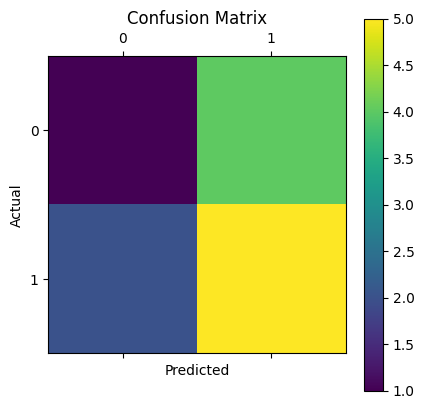

In [41]:
plt.matshow(matrix)
plt.colorbar()

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
accuracy_score(y_test2, y_pred2)

0.5

In [43]:
precision_score(y_test2, y_pred2)

0.5555555555555556

In [44]:
f1_score(y_test2, y_pred2)

0.625

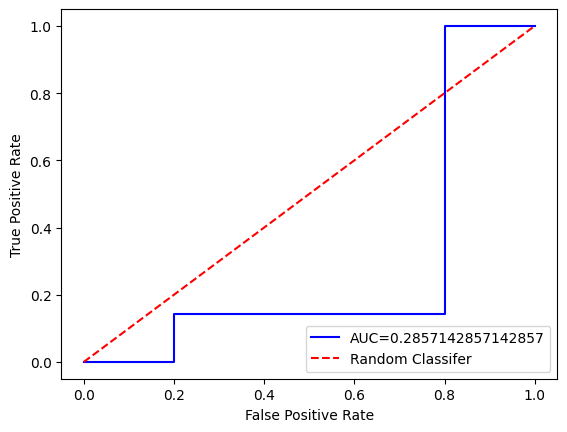

In [45]:
prob_estimates = model2.predict_proba(X_test2)
fpr, tpr, thresholds = roc_curve(y_test2, prob_estimates[:,1])
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, 'b', label=f'AUC={roc_auc}')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifer')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()